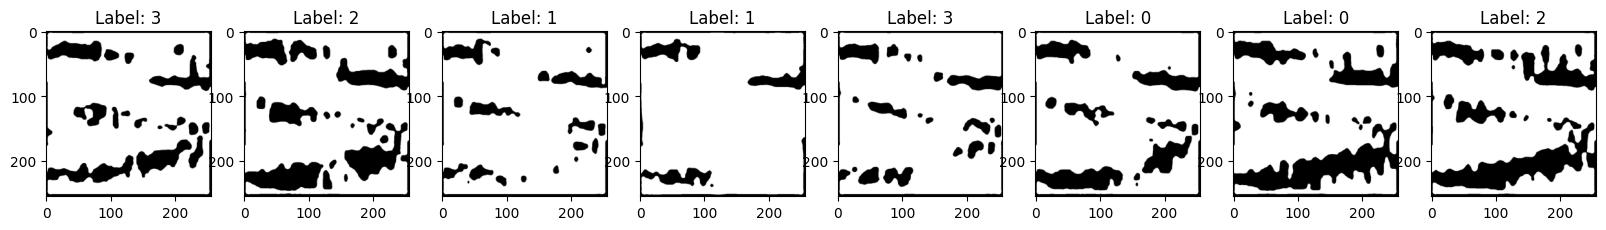

x_train shape: (335, 256, 256, 1), y_train shape: (335,)
x_test shape: (84, 256, 256, 1), y_test shape: (84,)
Class weights: {0: 0.881578947368421, 1: 0.9852941176470589, 2: 1.0737179487179487, 3: 1.0876623376623376}


In [6]:
import os
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths for Multiplexer images
multiplexer_paths = {
    "mode_1_high_bw": "Multiplexer-new/Mode_1/Mode_1-high_bandwidth",
    "mode_1_low_bw": "Multiplexer-new/Mode_1/Mode_1-low_bandwidth",
    "mode_2_high_bw": "Multiplexer-new/Mode_2/Mode_2-high_bandwidth",
    "mode_2_low_bw": "Multiplexer-new/Mode_2/Mode_2-low_bandwidth"
}

# Parameters
target_size = (256, 256)  # Standard target size for CNN
x_data = []
y_data = []

# **Function to Load and Resize Images without Distortion**
def load_grayscale_images(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        if file.endswith(".bmp"):  # Process only BMP files
            img_path = os.path.join(path, file)
            img = Image.open(img_path).convert('L')  # Convert to grayscale

            # **Ensure Aspect Ratio Preservation**
            old_size = img.size  # Original size (width, height)
            ratio = min(target_size[0] / old_size[0], target_size[1] / old_size[1])
            new_size = tuple([int(x * ratio) for x in old_size])

            img = img.resize(new_size, Image.Resampling.LANCZOS)  # Resize while keeping aspect ratio

            # **Pad Image to 256x256 (centered)**
            new_img = Image.new("L", target_size, 0)  # Create a black background
            paste_position = ((target_size[0] - new_size[0]) // 2, (target_size[1] - new_size[1]) // 2)
            new_img.paste(img, paste_position)

            images.append(np.array(new_img))  # Append as numpy array
            labels.append(label)

    return images, labels

# Load images for each category
for label, path in enumerate(multiplexer_paths.values()):
    images, labels = load_grayscale_images(path, label)
    x_data.extend(images)
    y_data.extend(labels)

# Convert lists to numpy arrays
x_data = np.array(x_data, dtype="float32") / 255.0  # Normalize pixel values to [0, 1]
x_data = np.expand_dims(x_data, axis=-1)  # Add channel dimension for grayscale
y_data = np.array(y_data, dtype="int")  # Convert labels to numpy array

# **Stratified Splitting for Balanced Class Distribution**
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=16)
for train_idx, test_idx in sss.split(x_data, y_data):
    x_train, x_test = x_data[train_idx], x_data[test_idx]
    y_train, y_test = y_data[train_idx], y_data[test_idx]

# **Calculate Class Weights to Handle Imbalance**
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# **Data Augmentation with Conservative Transformations**
datagen = ImageDataGenerator(
    rotation_range=10,  # Smaller rotation to avoid extreme distortions
    width_shift_range=0.1,  # Reduce shift range to avoid major cropping
    height_shift_range=0.1,
    zoom_range=0.1,  # Prevent excessive zooming
    horizontal_flip=True
)
datagen.fit(x_train)

# **Display Sample Images (Ensuring Full Image Visibility)**
fig, axes = plt.subplots(1, 8, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].squeeze(), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
plt.show()

# **Print dataset sizes**
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
print(f"Class weights: {class_weights}")


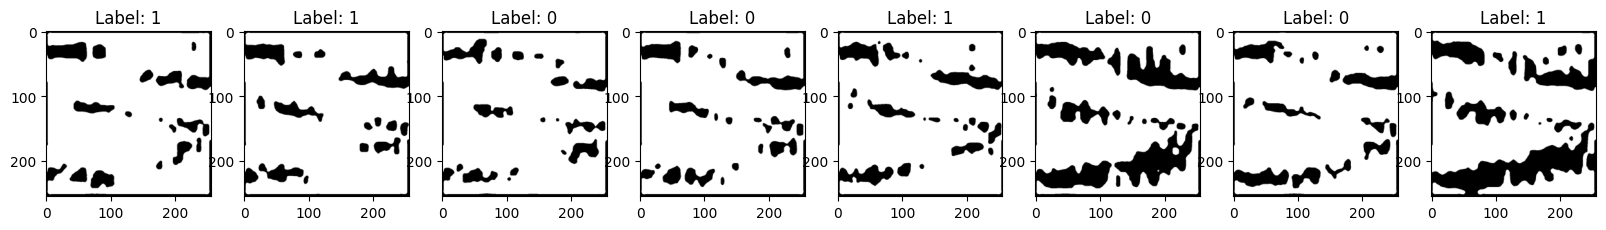

x_train shape: (335, 256, 256, 1), y_train shape: (335,)
x_test shape: (84, 256, 256, 1), y_test shape: (84,)
Class weights: {0: 0.9305555555555556, 1: 1.0806451612903225}


In [29]:
import os
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Corrected Dataset Paths (Only Mode 1 & Mode 2)**
multiplexer_paths = {
    "mode_1": ["Multiplexer-new/Mode_1/Mode_1-high_bandwidth", "Multiplexer-new/Mode_1/Mode_1-low_bandwidth"],
    "mode_2": ["Multiplexer-new/Mode_2/Mode_2-high_bandwidth", "Multiplexer-new/Mode_2/Mode_2-low_bandwidth"]
}

# Parameters
target_size = (256, 256)  # Standard target size for CNN
x_data = []
y_data = []

# **Function to Load and Resize Images without Distortion**
def load_grayscale_images(paths, label):
    images = []
    labels = []

    for path in paths:
        for file in os.listdir(path):
            if file.endswith(".bmp"):  # Process only BMP files
                img_path = os.path.join(path, file)
                img = Image.open(img_path).convert('L')  # Convert to grayscale

                # **Ensure Aspect Ratio Preservation**
                old_size = img.size  # Original size (width, height)
                ratio = min(target_size[0] / old_size[0], target_size[1] / old_size[1])
                new_size = tuple([int(x * ratio) for x in old_size])

                img = img.resize(new_size, Image.Resampling.LANCZOS)  # Resize while keeping aspect ratio

                # **Pad Image to 256x256 (centered)**
                new_img = Image.new("L", target_size, 0)  # Create a black background
                paste_position = ((target_size[0] - new_size[0]) // 2, (target_size[1] - new_size[1]) // 2)
                new_img.paste(img, paste_position)

                images.append(np.array(new_img))  # Append as numpy array
                labels.append(label)

    return images, labels

# **Load images for Mode 1 (label = 0) and Mode 2 (label = 1)**
for label, paths in enumerate(multiplexer_paths.values()):
    images, labels = load_grayscale_images(paths, label)
    x_data.extend(images)
    y_data.extend(labels)

# Convert lists to numpy arrays
x_data = np.array(x_data, dtype="float32") / 255.0  # Normalize pixel values to [0, 1]
x_data = np.expand_dims(x_data, axis=-1)  # Add channel dimension for grayscale
y_data = np.array(y_data, dtype="int")  # Convert labels to numpy array

# **Stratified Splitting for Balanced Class Distribution**
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=16)
for train_idx, test_idx in sss.split(x_data, y_data):
    x_train, x_test = x_data[train_idx], x_data[test_idx]
    y_train, y_test = y_data[train_idx], y_data[test_idx]

# **Calculate Class Weights for Only 2 Classes**
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# **Data Augmentation**
datagen = ImageDataGenerator(
    rotation_range=10,  # Small rotation to avoid extreme distortions
    width_shift_range=0.1,  # Reduce shift range
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# **Display Sample Images**
fig, axes = plt.subplots(1, 8, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].squeeze(), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
plt.show()

# **Print dataset sizes**
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
print(f"Class weights: {class_weights}")


In [30]:
from tensorflow.keras.utils import to_categorical

# Ensure labels have 3 classes (even though only 2 are used)
y_test_adjusted = to_categorical(y_test, num_classes=3)  # Keep 3 classes to match model output

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test_adjusted, verbose=1)

# Print results
print(f"\nMultiplexer Test Loss: {test_loss:.4f}")
print(f"Multiplexer Test Accuracy: {test_accuracy * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.4704 - loss: 4.0955

Multiplexer Test Loss: 4.0956
Multiplexer Test Accuracy: 46.43%


In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the pre-trained model
model = load_model("my_model.keras")

# Modify the last dense layer to fit the multiplexer dataset (2 classes instead of 3)
new_output = Dense(2, activation='softmax')(model.layers[-2].output)  # Change the last layer to 2 classes

# Create the new fine-tuned model
fine_tuned_model = Model(inputs=model.input, outputs=new_output)

# Compile the fine-tuned model
fine_tuned_model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0001),  # Lower LR for fine-tuning
    metrics=["accuracy"]
)

# Display model summary
fine_tuned_model.summary()


TypeError: Could not deserialize class 'Functional' because its parent module keras.src.engine.functional cannot be imported. Full object config: {'module': 'keras.src.engine.functional', 'class_name': 'Functional', 'config': {'name': 'model', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 128, 128, 1], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_1'}, 'registered_name': None, 'name': 'input_1', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 1]}, 'name': 'conv2d', 'inbound_nodes': [[['input_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'same', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 32]}, 'name': 'max_pooling2d', 'inbound_nodes': [[['conv2d', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 32]}, 'name': 'conv2d_1', 'inbound_nodes': [[['max_pooling2d', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'same', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 64]}, 'name': 'max_pooling2d_1', 'inbound_nodes': [[['conv2d_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_2', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 32, 32, 64]}, 'name': 'conv2d_2', 'inbound_nodes': [[['max_pooling2d_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'UpSampling2D', 'config': {'name': 'up_sampling2d', 'trainable': True, 'dtype': 'float32', 'size': [2, 2], 'data_format': 'channels_last', 'interpolation': 'nearest'}, 'registered_name': None, 'build_config': {'input_shape': [None, 32, 32, 64]}, 'name': 'up_sampling2d', 'inbound_nodes': [[['conv2d_2', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_3', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 64]}, 'name': 'conv2d_3', 'inbound_nodes': [[['up_sampling2d', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'UpSampling2D', 'config': {'name': 'up_sampling2d_1', 'trainable': True, 'dtype': 'float32', 'size': [2, 2], 'data_format': 'channels_last', 'interpolation': 'nearest'}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 64, 32]}, 'name': 'up_sampling2d_1', 'inbound_nodes': [[['conv2d_3', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_4', 'trainable': True, 'dtype': 'float32', 'filters': 1, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128, 128, 32]}, 'name': 'conv2d_4', 'inbound_nodes': [[['up_sampling2d_1', 0, 0, {}]]]}], 'input_layers': [['input_1', 0, 0]], 'output_layers': [['conv2d_4', 0, 0]]}, 'registered_name': 'Functional', 'build_config': {'input_shape': [None, 128, 128, 1]}, 'compile_config': {'optimizer': 'adam', 'loss': 'binary_crossentropy', 'metrics': None, 'loss_weights': None, 'weighted_metrics': None, 'run_eagerly': None, 'steps_per_execution': None, 'jit_compile': None}}

In [27]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical (for 2 classes)
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

# Train only on multiplexer dataset
history = fine_tuned_model.fit(
    x_train, y_train_categorical,
    validation_data=(x_test, y_test_categorical),
    epochs=20,
    batch_size=16
)

# Evaluate performance after fine-tuning
test_loss, test_accuracy = fine_tuned_model.evaluate(x_test, y_test_categorical)
print(f"Fine-tuned Test Accuracy: {test_accuracy * 100:.2f}%")


NameError: name 'fine_tuned_model' is not defined

## Code from Scratch

#### Load and Prepross Multiplexer Dataset

x_train shape: (335, 760, 770, 1), y_train shape: (335,)
x_test shape: (84, 760, 770, 1), y_test shape: (84,)


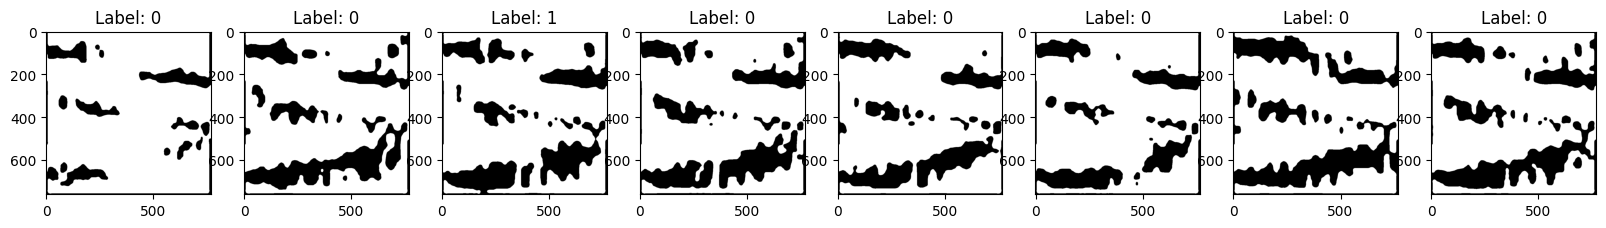

In [33]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define folder paths for the two classes (Mode 1 & Mode 2)
folder_paths = {
    "Mode_1_high": "Multiplexer-new/Mode_1/Mode_1-high_bandwidth",
    "Mode_1_low": "Multiplexer-new/Mode_1/Mode_1-low_bandwidth",
    "Mode_2_high": "Multiplexer-new/Mode_2/Mode_2-high_bandwidth",
    "Mode_2_low": "Multiplexer-new/Mode_2/Mode_2-low_bandwidth"
}

# Define corresponding labels
class_labels = {"Mode_1_high": 0, "Mode_1_low": 0, "Mode_2_high": 1, "Mode_2_low": 1}  # Mode 1 -> 0, Mode 2 -> 1

# Initialize lists for images and labels
x_data = []
y_data = []

# Load grayscale images and assign labels
for class_name, path in folder_paths.items():
    for file in os.listdir(path):
        if file.endswith(".bmp"):  # Process only BMP files
            img_path = os.path.join(path, file)
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img_array = np.array(img) / 255.0  # Normalize pixel values
            x_data.append(np.expand_dims(img_array, axis=-1))  # Add channel dimension
            y_data.append(class_labels[class_name])  # Assign label

# Convert to numpy arrays
x_data = np.array(x_data, dtype="float32")
y_data = np.array(y_data, dtype="int")

# Split dataset into train (80%) and test (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

# Display dataset information
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# Display sample images with labels
fig, axes = plt.subplots(1, 8, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].squeeze(), cmap="gray")
    ax.set_title(f"Label: {y_train[i]}")
plt.show()


#### Load Pre-Trained Model

In [39]:
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model("my_trained_model.h5")

# Print model summary to verify
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_4             │ (None, 127, 127, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,365 (497.52 KB)

 Trainable params: 126,915 (495.76 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

### Load Pretrained Model

In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Load the pretrained model
model = load_model("my_trained_model.h5")

# Check model architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_4             │ (None, 127, 127, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,365 (497.52 KB)

 Trainable params: 126,915 (495.76 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

#### Modify model to have 2 classes

In [53]:
# Get the second last layer (removing the last classification layer)
x = model.layers[-2].output  

# Add a new output layer with 2 classes (instead of 3)
new_output = Dense(2, activation="softmax")(x)

# Define the fine-tuned model
fine_tuned_model = Model(inputs=model.input, outputs=new_output)

# Compile the fine-tuned model
fine_tuned_model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

fine_tuned_model.summary()  # Verify changes


ValueError: The layer sequential_4 has never been called and thus has no defined input.

#### Evaluate Model on Multiplexer Dataset

In [48]:
# Evaluate model on Multiplexer test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=1)

# Print results
print(f"\nMultiplexer Test Loss: {test_loss:.4f}")
print(f"Multiplexer Test Accuracy: {test_accuracy * 100:.2f}%")


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 2), output.shape=(None, 3)

#### Fine-Tune the Model (since Accuracy is Low)

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Modify the last dense layer to fit the Multiplexer dataset (2 classes instead of 3)
new_output = Dense(2, activation="softmax")(model.layers[-2].output)  # Change last layer to 2 classes

# Create the fine-tuned model
fine_tuned_model = Model(inputs=model.input, outputs=new_output)

# Compile the fine-tuned model
fine_tuned_model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0001),  # Lower LR for fine-tuning
    metrics=["accuracy"]
)

# Display the model summary
fine_tuned_model.summary()


ValueError: The layer sequential_4 has never been called and thus has no defined input.

#### Freeze early layers but keep their weigths intact

In [50]:
# Freeze all layers except the last few
for layer in model.layers[:-2]:  # Freeze all layers except the last 2
    layer.trainable = False


#### Train Model on Multiplexer Dataset

In [51]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

# Train only on the multiplexer dataset
history = fine_tuned_model.fit(
    x_train, y_train_categorical,
    validation_data=(x_test, y_test_categorical),
    epochs=20,  # Train for 20 epochs
    batch_size=16,  # Batch size of 16
    verbose=1
)

# Evaluate performance after fine-tuning
test_loss, test_accuracy = fine_tuned_model.evaluate(x_test, y_test_categorical)

# Print results
print(f"\nFine-tuned Test Loss: {test_loss:.4f}")
print(f"Fine-tuned Test Accuracy: {test_accuracy * 100:.2f}%")


NameError: name 'fine_tuned_model' is not defined